In [1]:
!python --version

Python 3.7.3


In [3]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [4,3]

In [2]:
import cv2
import numpy as np
import argparse
import glob
import matplotlib.pyplot as plt

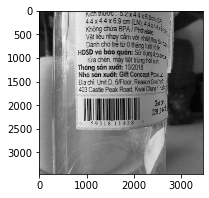

In [7]:
image = cv2.imread("02.jpg", 0)
image_out = cv2.imread("02.jpg")
plt.imshow(image, cmap='gray')

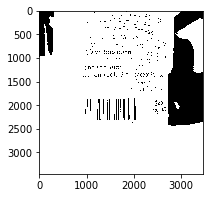

In [8]:
#thresholding
ret, thresh = cv2.threshold(image, 50, 255, cv2.THRESH_BINARY)
plt.imshow(thresh, cmap='gray')

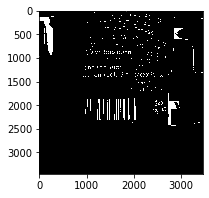

In [9]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (200,200))
#remove some noise
opening = cv2.morphologyEx(thresh, cv2.MORPH_BLACKHAT, kernel)
plt.imshow(opening, cmap='gray')

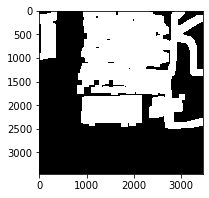

In [10]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (130, 130))
dilation = cv2.dilate(opening, kernel)
plt.imshow(dilation, cmap='gray')

In [17]:
# find the contours in the thresholded image
(cnts, _) = cv2.findContours(dilation.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# otherwise, sort the contours by area and compute the rotated
# bounding box of the largest contour
c = sorted(cnts, key = cv2.contourArea, reverse = True)[1]
rect = cv2.minAreaRect(c)
box = np.int0(cv2.boxPoints(rect))

In [18]:
cv2.drawContours(image_out, [box], -1, (0, 255, 0), 3)

array([[[ 22,  47,  43],
        [ 19,  44,  40],
        [ 16,  41,  37],
        ...,
        [  8,  21,  19],
        [  7,  20,  18],
        [  8,  21,  19]],

       [[ 17,  42,  38],
        [ 16,  41,  37],
        [ 15,  40,  36],
        ...,
        [  9,  22,  20],
        [  8,  21,  19],
        [  8,  21,  19]],

       [[ 18,  43,  39],
        [ 16,  41,  37],
        [ 15,  40,  36],
        ...,
        [  8,  21,  19],
        [  8,  21,  19],
        [  7,  20,  18]],

       ...,

       [[130, 137, 146],
        [128, 135, 144],
        [129, 136, 145],
        ...,
        [ 98, 108, 118],
        [ 99, 109, 119],
        [100, 110, 120]],

       [[132, 139, 148],
        [129, 136, 145],
        [128, 136, 143],
        ...,
        [ 97, 107, 117],
        [ 97, 107, 117],
        [ 96, 106, 116]],

       [[129, 136, 145],
        [126, 133, 142],
        [124, 132, 139],
        ...,
        [ 98, 108, 118],
        [ 98, 108, 118],
        [ 97, 107, 117]]

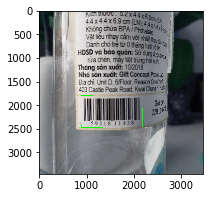

In [19]:
plt.imshow(image_out)


In [20]:
cv2.imwrite('out02.jpg', image_out)

True